# Spam detection classifiers

In [1]:
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
from helpers import plot_confusion_matrices

In [2]:
# File paths for the pickle files
x_train_path = 'data/X_train.pkl'
x_test_path = 'data/X_test.pkl'
y_train_path = 'data/y_train.pkl'
y_test_path = 'data/y_test.pkl'

# Reading the pickle files
with open(x_train_path, 'rb') as file:
    X_train = pickle.load(file)

with open(x_test_path, 'rb') as file:
    X_test = pickle.load(file)

with open(y_train_path, 'rb') as file:
    y_train = pickle.load(file)

with open(y_test_path, 'rb') as file:
    y_test = pickle.load(file)

In [3]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## K-nearest neighbors

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicting the labels for test set
y_pred_test = knn_model.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test, y_pred_test):>10.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy:     0.863

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.84      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.87      0.86      0.87      1035



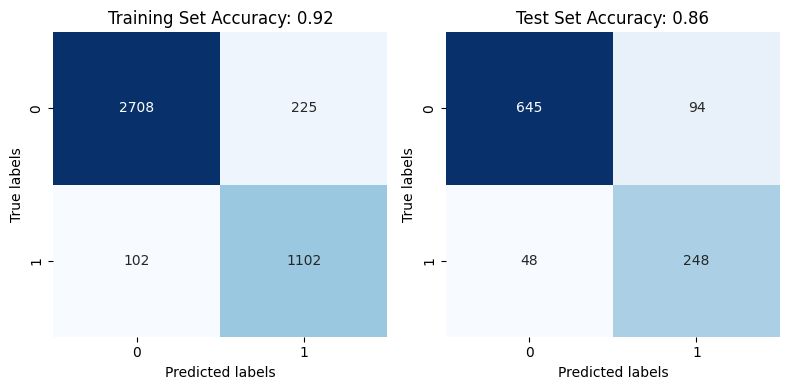

In [16]:
y_pred_train = knn_model.predict(X_train)

plot_confusion_matrices(y_train, y_pred_train, y_test, y_pred_test, "images/ConfusionMatrix_KNN.png")

## SVM

In [8]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy:{accuracy:>10.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy:     0.959

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



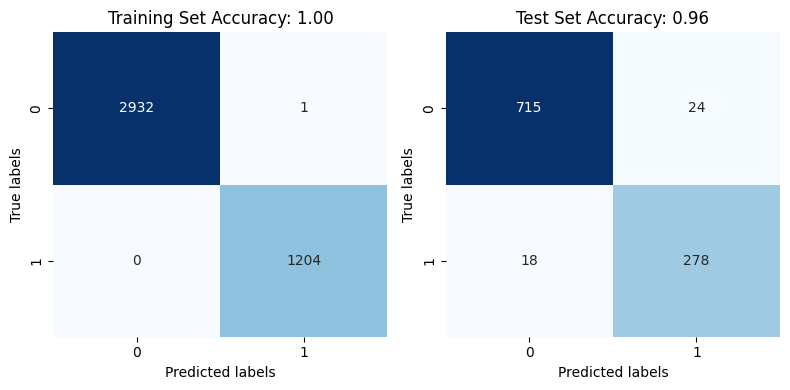

In [9]:
y_pred_train = svm_model.predict(X_train)

plot_confusion_matrices(y_train, y_pred_train, y_test, y_pred_test, "images/ConfusionMatrix_SVM.png")

## Random Forest

In [10]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting the labels for test set
y_pred_test = rf_model.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test, y_pred_test):>10.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy:     0.978

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       739
           1       0.96      0.96      0.96       296

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



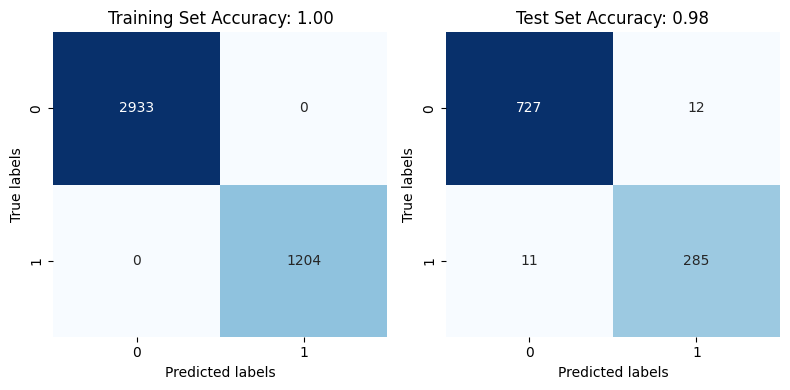

In [11]:
y_pred_train = rf_model.predict(X_train)

plot_confusion_matrices(y_train, y_pred_train, y_test, y_pred_test, "images/ConfusionMatrix_RF.png")

## Neural Net

In [12]:
# Model definition
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [13]:
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
# loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)

y_pred_test = (nn_model.predict(X_test) > 0.5).astype("int32")

print(f"Test Accuracy:{accuracy_score(y_test, y_pred_test):>10.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Test Accuracy:     0.977

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       739
           1       0.96      0.96      0.96       296

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


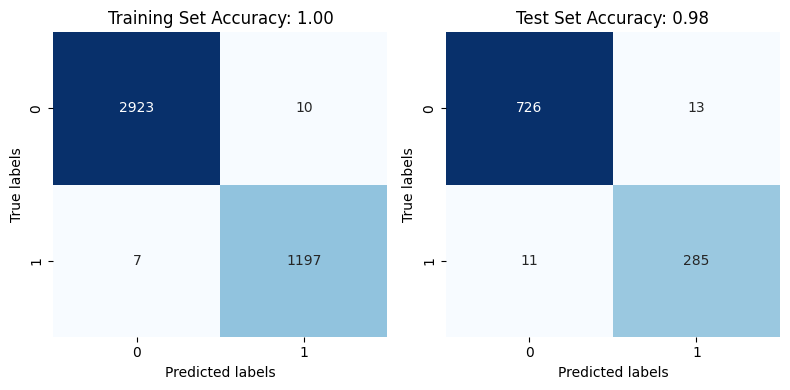

In [14]:
y_pred_train = (nn_model.predict(X_train) > 0.5).astype("int32")

plot_confusion_matrices(y_train, y_pred_train, y_test, y_pred_test, "images/ConfusionMatrix_NN.png")

## Creating figure for confusion matrices of all classifier

In [12]:
# Assuming classifier_list is a list of your trained classifier models
classifier_names = [knn_model, svm_model, rf_model, nn_model]
fig, axes = plt.subplots(nrows=len(classifier_names), ncols=2, figsize=(10, 20))

for idx, clf in enumerate(classifier_names):
    # Assuming X_train, y_train, X_test, y_test are defined
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Plot training confusion matrix
    ax = axes[idx, 0]  # Row idx, Column 0 for training
    plot_confusion_matrix(cm_train, ax=ax, title=f'Train {classifier_names[idx]}')

    # Plot testing confusion matrix
    ax = axes[idx, 1]  # Row idx, Column 1 for testing
    plot_confusion_matrix(cm_test, ax=ax, title=f'Test {classifier_names[idx]}')

plt.tight_layout()
plt.show()


NameError: name 'svm_model' is not defined